# Colour Picker

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pyperclip

import random
import glob

In [2]:
#Dataset
read_path = "../../data/birds/"
img_path = glob.glob(read_path + "*.jpg")

print(len(img_path))

8


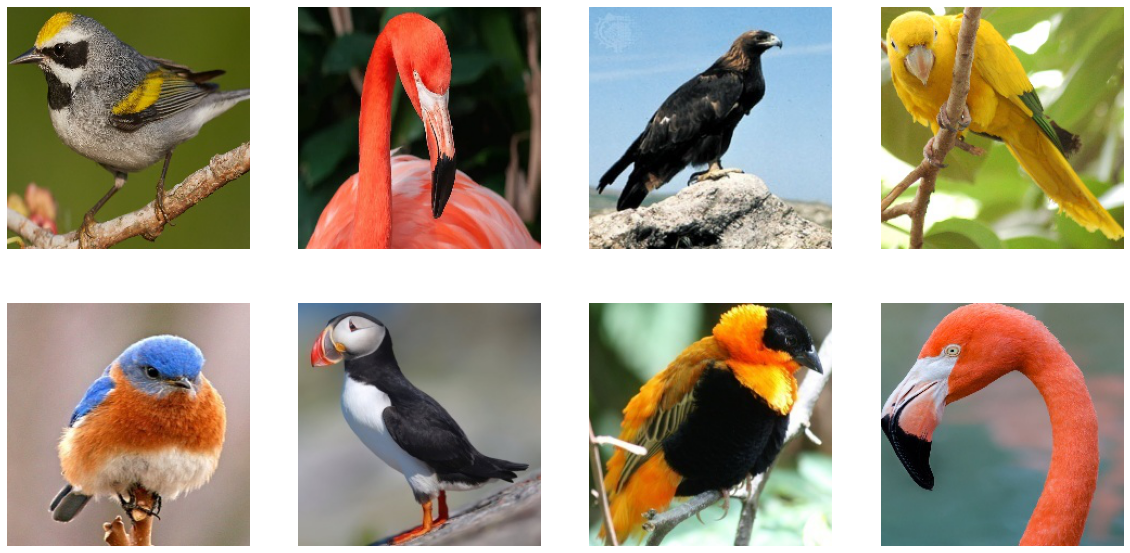

In [3]:
#Example images
fig,ax = plt.subplots(2,4,figsize=(20,10))

count = 0
for i in range(2):
    for j in range(4):
        
        img = mpimg.imread(img_path[count])
        
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
        ax[i,j].axis("tight")
        ax[i,j].axis("image")
        
        
        count+=1

## Colour picker 1 

In [4]:
def onclick(event):
    global img
    
    # get x,y of click
    x = round(event.xdata)
    y = round(event.ydata)
    
    # get RGB values
    rgb = img[y][x]
    
    # save to clip board
    pyperclip.copy(str(rgb))

<IPython.core.display.Javascript object>


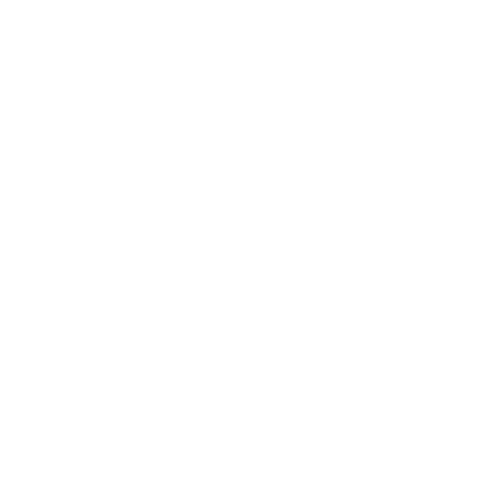

In [5]:
%matplotlib notebook
global img

fig = plt.figure(figsize=(5,5))

#Load image and add count
path = img_path[-1]
img = mpimg.imread(path)

#Add an interactive widget to figure 
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.imshow(img)
plt.show()

## Colour picker 2 

In [3]:
def onclick(event):
    global img
    global rgb
    
    # get x,y of click
    x = round(event.xdata)
    y = round(event.ydata)
    
    # get RGB values
    rgb = img[y][x]
    
    #Update second plot with colour
    change_choice()

In [4]:
def onpress(event):
    global rgb
    global colours
    
    #Get key 
    key = event.key

    if key == 'n':
        change_image()
        
    elif key == 'c':
         # save to clip board
        pyperclip.copy(str(rgb))
        
        # add to list of colours
        colours.append(rgb)
        
        change_choice()

In [5]:
def change_image():
    global img_path
    global img
    global ax
    global rgb
    
    # close all open plots
    plt.close('all')
    
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    
    # add an interactive widget to figure 
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    cid2 = fig.canvas.mpl_connect('key_press_event', onpress)

    # load random image
    path = random.choice(img_path)
    img = mpimg.imread(path)
    
    ax[0].imshow(img)
    
    # reset the colour window
    rgb = [255,255,255]
    change_choice()


In [6]:
def change_choice():
    global img
    global ax
    global colours
    global rgb
    
    # remove previous count
    for txt in ax[1].texts:
        txt.set_visible(False)
    
    # create array of colour choice
    dims = np.shape(img)
    col = np.array([[rgb]*dims[0]]*dims[1])
    ax[1].imshow(col)
    
    # update colour count
    ax[1].text(0, 15, len(colours),color='r',size=20)
    
    plt.show()

In [7]:
%matplotlib tk
global img_path
global colours
colours = []

# load image paths
read_path = "../../data/birds/"
img_path = glob.glob(read_path + "*.jpg")

# start widget
change_image()

In [8]:
colours

[array([ 69, 123, 223], dtype=uint8),
 array([166,  75,  30], dtype=uint8),
 array([205, 179, 162], dtype=uint8),
 array([203,  70,  27], dtype=uint8),
 array([ 75, 115, 114], dtype=uint8),
 array([10,  8,  9], dtype=uint8),
 array([226,  49,  41], dtype=uint8),
 array([221, 225, 236], dtype=uint8),
 array([253, 179,   2], dtype=uint8),
 array([43, 56, 26], dtype=uint8),
 array([7, 9, 8], dtype=uint8),
 array([194, 237, 210], dtype=uint8),
 array([49, 57, 59], dtype=uint8),
 array([163, 202, 231], dtype=uint8),
 array([250, 247, 232], dtype=uint8)]